In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# from ortools.linear_solver import pywraplp
# from ortools.init import pywrapinit
# from random import uniform?

import random

import tmgen # to install: https://tmgen.readthedocs.io/en/latest/quickstart.html

In [2]:
# Constants etc:
random.seed(0)
# STORAGE_SELECTION_SCHEME = 'RANDOM'
STORAGE_SELECTION_SCHEME = 'DEGREE'

In [3]:
'''
Choosing to work with the Abilene graph for a start:
'''

# the following function reads the data file to construct the nx library graph object
def graph_obj_for_Abilene():
    ### Abilene
    with open('./Data/Abilene/topo-2003-04-10.txt') as file:
            data = [line.rstrip() for line in file]
    data = [line.split('\t') for line in data]
    topology = data[18:]

    nodes = set()

    for edge in topology:
        src_node = edge[0]
        dst_node = edge[1]
        nodes.add(src_node)
        nodes.add(dst_node)

    Abilene = nx.DiGraph()

    for node in nodes:
        Abilene.add_node(node)

    for edge in topology:
        src_node = edge[0]
        dst_node = edge[1]
        Abilene.add_edge(src_node, dst_node)

    return Abilene

# The following function generates table # 3 in the paper. (to make sure everything is looking correct)
def table3(G, name):
    # table III from the QON paper:
    table = {}
    
    cardinality_v = G.number_of_nodes()
    cardinality_e = G.number_of_edges()
    
    # The average degree of an undirected graph is the sum of the degrees of all its nodes divided by the number of nodes in the graph. 
    # For a directed graph, each edge accounts to 1 degree, and not two (as the edges grant a degree just to one vertex, and not two vertices). Therefore, for a directed graph, the average degree is simply the number of edges divided by the number vertices.
    avg_degree = cardinality_e/cardinality_v

    diameter = nx.diameter(G)

    table = {
        'Topology': name, 
        '|V|': cardinality_v, 
        '|E|': cardinality_e, 
        'Avg. Degree': avg_degree, 
        'Diameter': diameter
    }

    return table

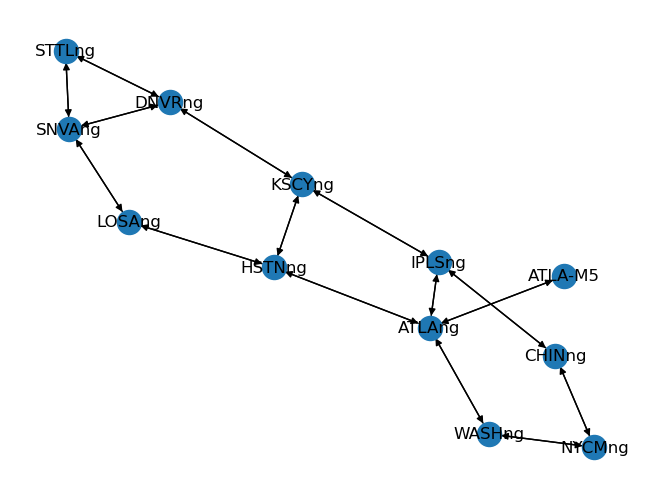

In [4]:
G = graph_obj_for_Abilene()
nx.draw(G, with_labels = True)

In [5]:
table3(G, 'Abilene')

{'Topology': 'Abilene',
 '|V|': 12,
 '|E|': 30,
 'Avg. Degree': 2.5,
 'Diameter': 5}

In [6]:
# Fixed parameter values:
# values from Table II:

delta = 20 # Δ = 20 sec = duration of 1 time interval in seconds

T = set(t for t in range(0, 10*delta, delta))   # |T| = 10

# c_u_v :  capacity of link (u, v) in EPRs/sec. Values fixed as follows: c(u,v) = Unif[200,1400]
c_u_v = dict()
u_v_pairs = [(u, v) for u in G.nodes for v in G.nodes] # should be list of pairs as tuples.
for uv in u_v_pairs:
    u = uv[0]
    v = uv[1]
    # special case of u-u and v-v pair. ignoring capacity for now. TODO: confirm
    if u == v:
        continue
    else:
        capacity = random.uniform(200, 1400)
    c_u_v[(u, v)] = capacity

link_fidelity = random.uniform(0.96,0.99) # Link Fidelity = Unif[0.96,0.99]

B_s = 12000 # the capacity of storage servers in no. of EPR pairs (all servers have a fixed value of 12000)

In [10]:
# storage selection schemes:

# some things are unclear in the paper. For now, selecting a random number of storage servers. Then for this number, choosing the nodes as per the two schemes:
no_of_storage_node = random.randint(0, G.number_of_nodes())
selected_nodes = []
if STORAGE_SELECTION_SCHEME == 'RANDOM':
    for _ in range(no_of_storage_node):
        while True:
            random_node = random.choice(list(G.nodes()))
            if random_node not in selected_nodes:
                selected_nodes.append(random_node)
                break # break the while loop. Continues to randomly pick another node if picked an already-picked node again
elif STORAGE_SELECTION_SCHEME == 'DEGREE':
    nodes_list = list(G.degree)
    nodes_list = sorted(nodes_list, key=lambda x: x[1], reverse=True)
    for _ in range(no_of_storage_node):
        selected_nodes.append(nodes_list[0][0])
        del nodes_list[0]
else:
    raise Exception("Unknown storage selection scheme") 

print("Picked", len(selected_nodes), "nodes as follows:")
print(selected_nodes)

Picked 4 nodes as follows:
['ATLAng', 'HSTNng', 'DNVRng', 'IPLSng']


In [ ]:
# purification and swapping:

# TODO

In [114]:
# workload: 
# selecting user pairs

no_of_user_pairs = 6 # fixed value in paper
# it is unclear how they are choosing these user pairs so for now i am going to randomly choose 6 pairs

selected_pairs = [] # list of tuples
for _ in range(no_of_user_pairs):
    user1 = random.choice(list(G.nodes()))
    while True:
        user2 = random.choice(list(G.nodes()))
        if user1 != user2:
            break
    selected_pairs.append((user1, user2))

# print(selected_pairs)

# generating demands:

    # tmgen.models.spike_tm()
    # Generate a traffic matrix using the spike model.

    # Parameters:	
    # num_nodes  = number of nodes in the network
    # num_spikes = number of ingress-egress spikes. Must be fewer than numpops2
    # mean_spike = average volume of a single spike
    # num_epochs = number of time epochs

    # Returns:	
    # TrafficMatrix object
num_nodes = no_of_user_pairs
num_epochs = len(T) # no of time intervals
num_spikes = 3 # 3 user pairs. fixed value in the paper
    # calculating mean_spike:
capacity_of_this_topology = # TODO
tmgen.models.spike_tm(num_nodes, num_spikes, mean_spike, num_epochs)

'\ntmgen.models.spike_tm()\nGenerate a traffic matrix using the spike model.\n\nParameters:\t\nnum_nodes  = number of nodes in the network\nnum_spikes = number of ingress-egress spikes. Must be fewer than numpops2\nmean_spike = average volume of a single spike\nnum_epochs = number of time epochs\n\nReturns:\t\nTrafficMatrix object\n'

10